
# MODUL 12 - Feature Matching, Face Detection, Face Tracking

LukasValentino / 15 / 2141720032

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os

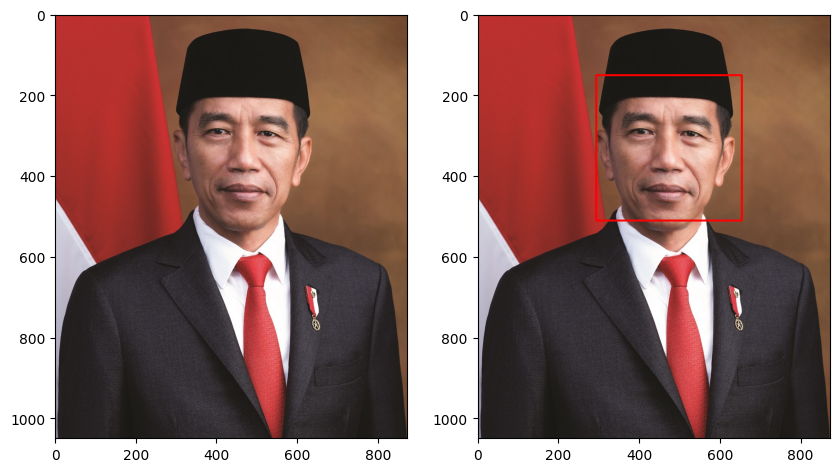

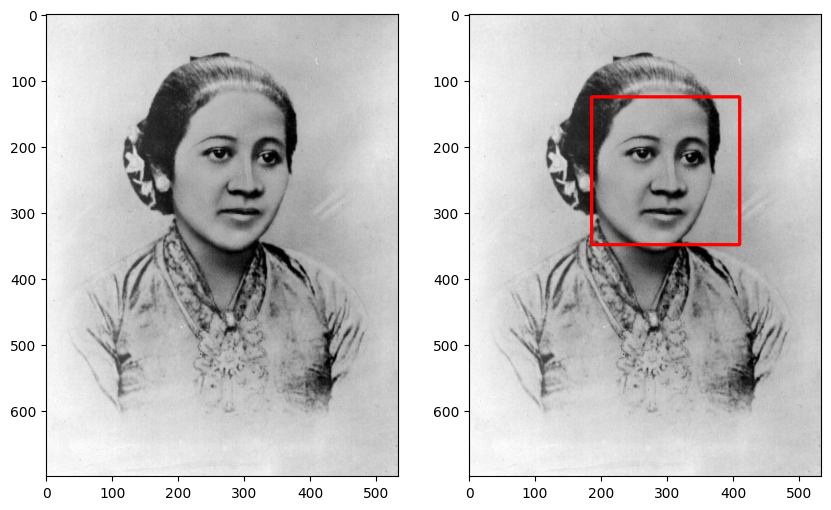

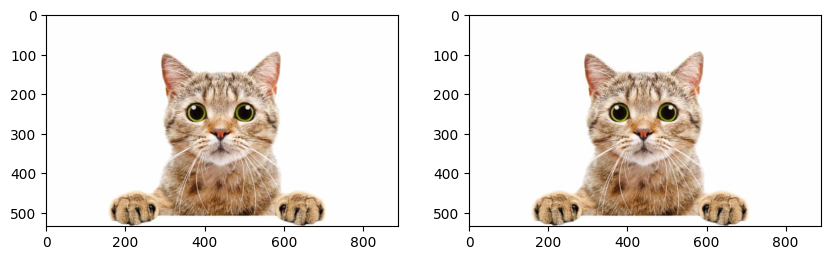

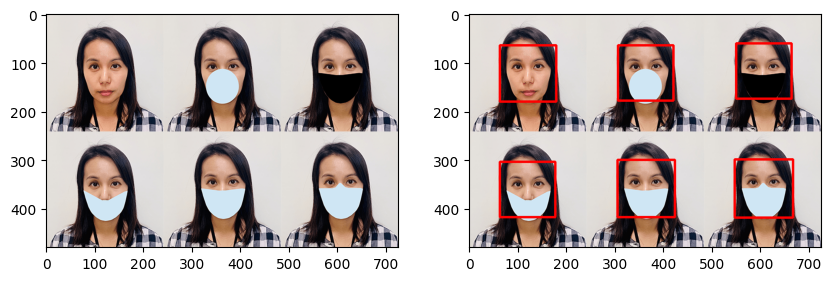

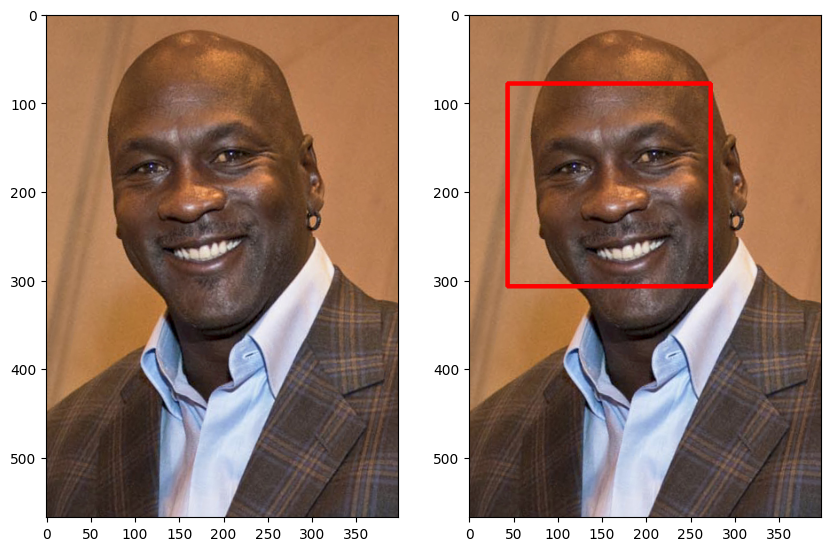

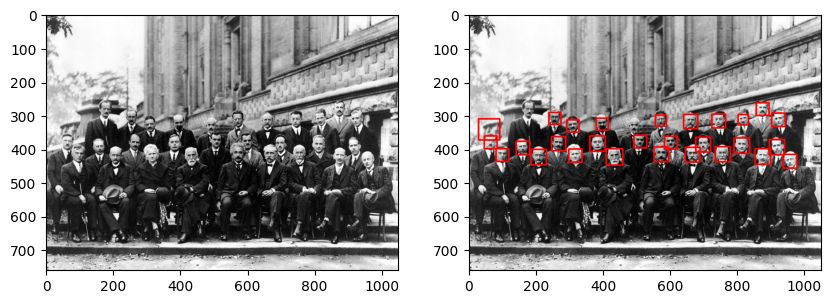

In [3]:
def detect_face(img, cascade):
  cascade_wajah = cv.CascadeClassifier(cascade)
  img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
  img_1 = img_rgb.copy()
  roi_wajah = cascade_wajah.detectMultiScale(img_1)

  for(x,y,w,h) in roi_wajah:
    cv.rectangle(img_1,(x,y),(x+w,y+h),(255,0,0), 4)

  plt.figure(figsize = (10,10))
  plt.subplot(121), plt.imshow(img_rgb)
  plt.subplot(122), plt.imshow(img_1)

path = '/content/drive/MyDrive/PCVK-2023/facedet'
list_face = ['jokowi.jpg', 'kartini.jpg', 'kucing.jpg', 'mask.png', 'mjordan.jpg', 'solvayconf.jpg']

for name_file in list_face:
  img = cv.imread(os.path.join(path, name_file))
  cascade = '/content/drive/MyDrive/PCVK-2023/KTP_More/haarcascades/haarcascade_frontalface_alt.xml'
  detect_face(img, cascade)

Pada Soal No.2. wajah kucing tidak bisa dideteksi dengan baik. Lakukan deteksi wajah kucing hingga muncul rectangle pada bagian wajahnya. Petunjuk pada soal ini, perhatikan pretrained features yang telah disediakan OpenCV. Gunakan xml yang ada jika memang telah disediakan. Jika belum ada, coba cari dengan searching melalui search engines.

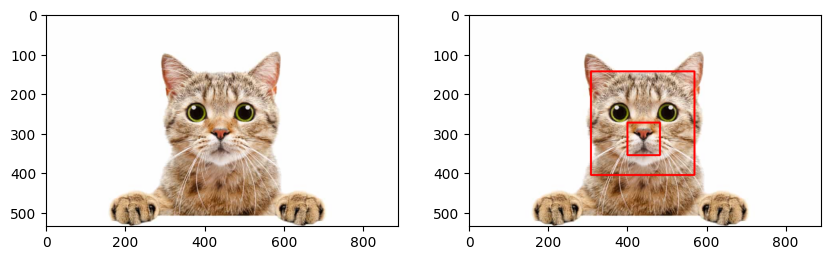

In [4]:
cat_image = cv.imread('/content/drive/MyDrive/PCVK-2023/facedet/kucing.jpg')
cascade = '/content/drive/MyDrive/PCVK-2023/KTP_More/haarcascades/haarcascade_frontalcatface.xml'
detect_face(cat_image, cascade)

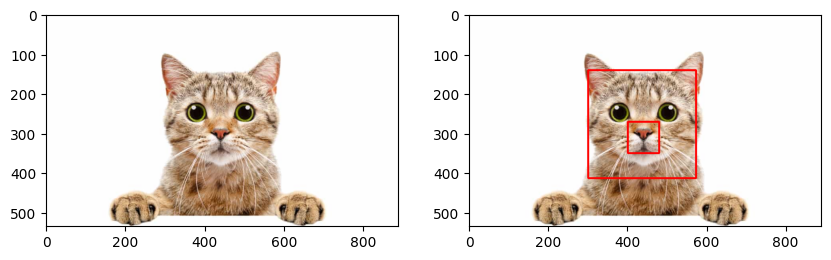

In [5]:
cat_image = cv.imread('/content/drive/MyDrive/PCVK-2023/facedet/kucing.jpg')
cascade = '/content/drive/MyDrive/PCVK-2023/KTP_More/haarcascades/haarcascade_frontalcatface_extended.xml'
detect_face(cat_image, cascade)

Cobakan juga untuk eyes detection.

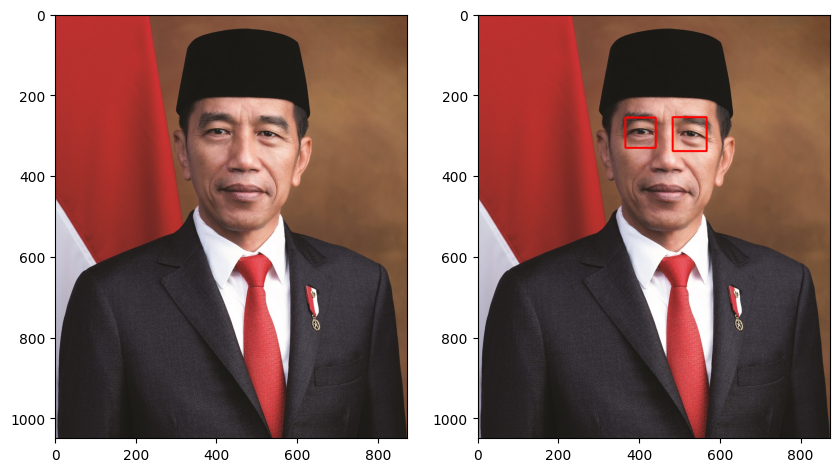

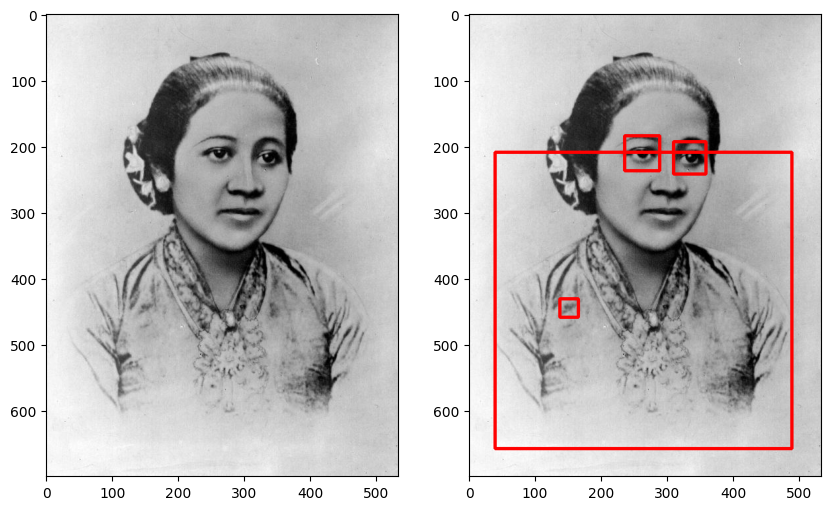

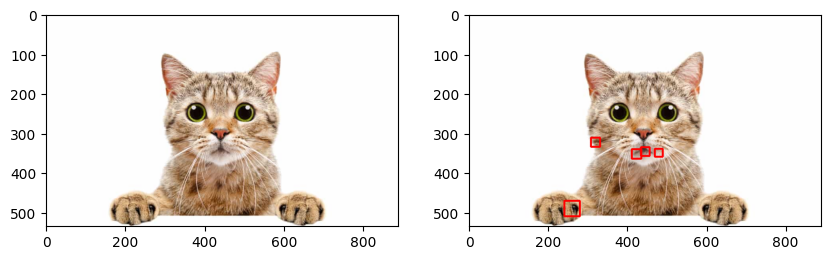

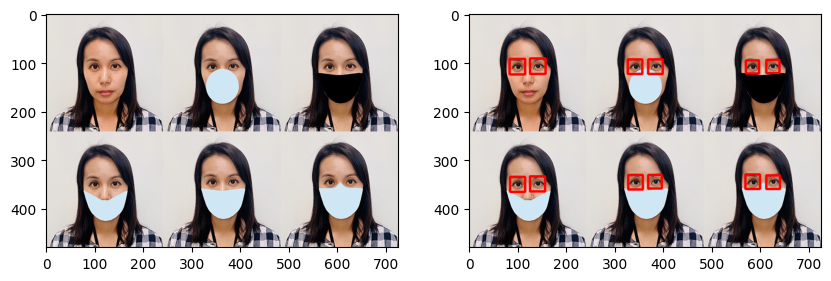

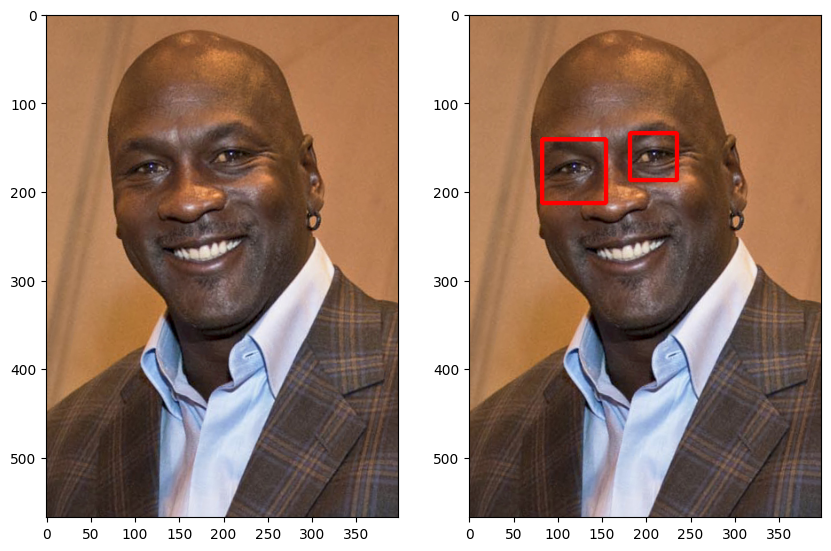

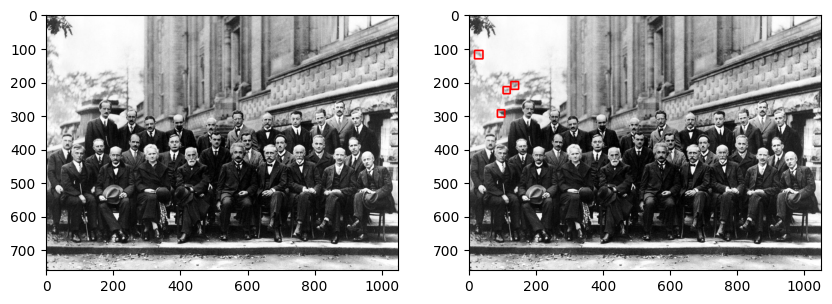

In [6]:
path = '/content/drive/MyDrive/PCVK-2023/facedet'
list_face = ['jokowi.jpg', 'kartini.jpg', 'kucing.jpg', 'mask.png', 'mjordan.jpg', 'solvayconf.jpg']

for name_file in list_face:
  img = cv.imread(os.path.join(path, name_file))
  cascade = '/content/drive/MyDrive/PCVK-2023/KTP_More/haarcascades/haarcascade_eye.xml'
  detect_face(img, cascade)

Lakukan Face Tracking menggunakan Google Colab. Petunjuk, Tutorial selengkapnya tentang akses kamera dan FaceDetection pada google colab

In [7]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import PIL
import io
import html
import time

In [8]:

# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [9]:

# initialize the Haar Cascade face detection model
face_cascade = cv.CascadeClassifier(cv.samples.findFile(cv.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [10]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  # grayscale img
  gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv.imwrite(filename, img)

  return filename

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


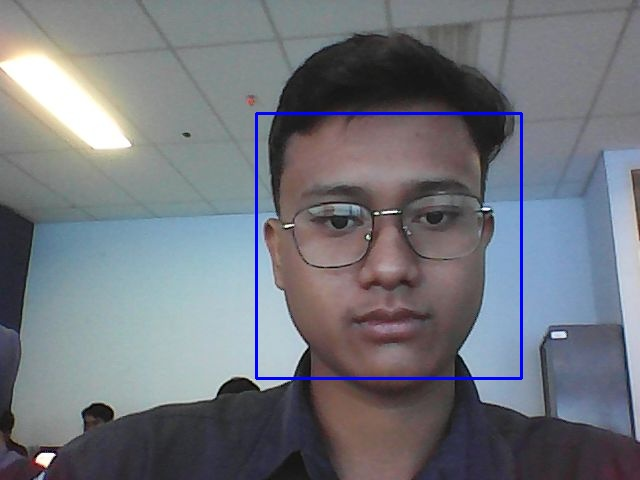

In [11]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

Lakukan blurring

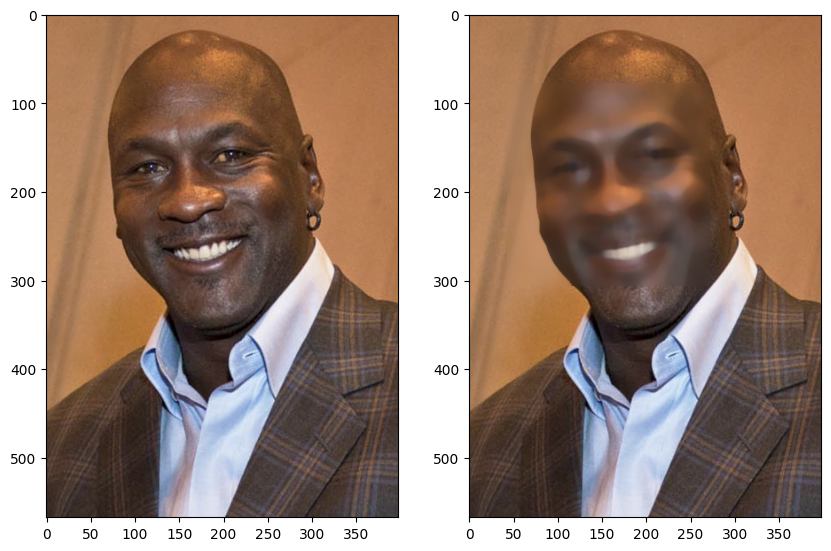

In [12]:
def blur_face(img):
  cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/PCVK-2023/KTP_More/haarcascades/haarcascade_frontalface_alt.xml')
  img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
  img_1 = img_rgb.copy()
  roi_wajah = cascade_wajah.detectMultiScale(img_1)

  for(x,y,w,h) in roi_wajah:
    roi = img_1[y:y+h, x:x+w]
    blur = cv.medianBlur(roi, 15)
    img_1[y:y+h, x:x+w] = blur

  plt.figure(figsize = (10,10))
  plt.subplot(121), plt.imshow(img_rgb)
  plt.subplot(122), plt.imshow(img_1)

path = '/content/drive/MyDrive/PCVK-2023/facedet'
list_face = ['mjordan.jpg']

for name_file in list_face:
  img = cv.imread(os.path.join(path, name_file))
  blur_face(img)

 Lakukan segmentasi karakter pada KTP seperti gambar berikut

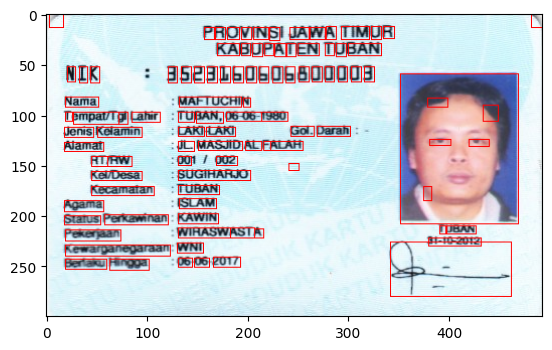

In [17]:
ktp = cv.imread('/content/drive/MyDrive/PCVK-2023/KTP_More/ktp4.png')

gray = cv.cvtColor(ktp, cv.COLOR_BGR2GRAY)

# Metode adaptif thresholding untuk menangani variasi pencahayaan
bw = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY_INV, 11, 15)

kernel = np.ones((2, 2), np.uint8)
morphology = cv.morphologyEx(bw, cv.MORPH_CLOSE, kernel)

contours, _ = cv.findContours(morphology, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

for contour in contours:
    x, y, w, h = cv.boundingRect(contour)
    if w > 5 and h > 5:  # Menyesuaikan batas ukuran karakter yang terdeteksi
        cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), 1)

result = cv.cvtColor(ktp, cv.COLOR_BGR2RGB)

plt.imshow(result)
plt.show()

Cropping NIK KTP


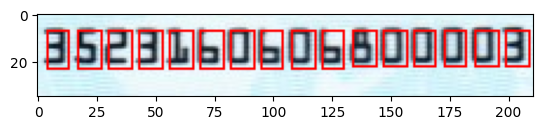

In [18]:
start_x = 117
start_y = 45
end_x = 328
end_y = 80

nik = result[start_y:end_y, start_x:end_x]
plt.imshow(nik)